<a href="https://colab.research.google.com/github/Imperius0299/nn_excercise/blob/main/NN_Pr%C3%A4sentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Neuronales Netz was herausfindem soll, ob es sich bei einem Bild um ein T-Shirt handelt

In [ ]:
import tensorflow as tf

#Trainingsdaten und Testdaten werden geladen
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

#Alle Testlabels die nicht die Kategorie T-shirt(0) haben, werden auf False gesetzt, der Rest auf True
test_labels = test_labels == 0   

In [ ]:
train_images.shape

(60000, 28, 28)

<function matplotlib.pyplot.show>

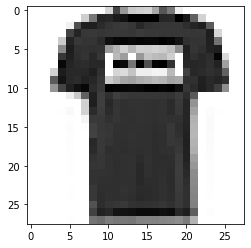

In [ ]:
#Anzeigen eines Bildes
%matplotlib inline 
import matplotlib.pyplot as plt

plt.imshow(train_images[1], cmap="gray_r")
plt.show

In [ ]:
#hier werden die Zielwerte auf das T-Shirt festgelegt, das selbe wie oben bei den Test Daten
train_labels = train_labels == 0 
print(train_labels)

[False  True  True ... False  True False]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#Neuronales Netz erstellen, mit einem Hidden-Layer mit 100 Neuronen, einem Output, und 784 Inputs(28*28, da jedes Pixel einzeln gesehen wird)
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.SpecificityAtSensitivity(0.5)])

In [ ]:
#Trainieren des Models, je Mehr Epochen, desto niedriger die Kosten und desto besser die Genauigkeit
model.fit(train_images.reshape(60000, 784),
          train_labels,
          epochs=1,
          batch_size=1000)

In [ ]:
#Vorhersage eines Wertes, image_num = Index des Boldes in der Liste um es Anzuzeigen und vorherzusagen
image_num = 10
x = model.predict(train_images[image_num].reshape(-1,784))
print(x)
print("Wahrscheinlichkeit das es sich um ein T-Shirt handelt beträgt {percent:.2f} % \n".format(percent = x[0][0] * 100))

%matplotlib inline 
import matplotlib.pyplot as plt

plt.imshow(train_images[image_num], cmap="gray_r")
plt.show

In [ ]:
#Prüfen des Trainingsdatensatzes auf Genauigkeit mit dem Model, erste Zahl ist die Anzahl der Bilder, zweite ist Inputanzahl
model.evaluate(train_images.reshape(60000, 784), train_labels)

In [ ]:
#Prüfen des Testdatensatzes auf Genauigkeit mit dem Model
model.evaluate(test_images.reshape(10000,784), test_labels)#batch_size=1000)

In [ ]:
model.metrics_names